In [2]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("jamb data 2017-2018 revised - With YoY Growth Rate.xlsx", engine='openpyxl')

# Preview the data
print(df.head(20))


   Unnamed: 0           JOINT ADMISSIONS AND MATRICULATION BOARD Unnamed: 2  \
0         NaN  APPLICANTS STATISTICS BY STATE AND GENDER FROM...        NaN   
1         NaN                                                NaN       2017   
2         S/N                                              STATE          F   
3           1                               ABIA                      27351   
4           2                               ADAMAWA                    9187   
5           3                               AKWA IBOM                 32081   
6           4                               ANAMBRA                   42764   
7           5                               BAUCHI                     6681   
8           6                               BAYELSA                    9416   
9           7                               BENUE                     27239   
10          8                               BORNO                      9547   
11          9                               CROSS RI

In [4]:
# Rename the columns
df.columns = [
    "S/N", "State",
    "2017_Female", "2017_Male", "2017_Total",
    "2018_Female", "2018_Male", "2018_Total",
    "YoY_Growth_Rate"
]

# Preview the cleaned DataFrame
print(df.head(10))

   S/N                                              State 2017_Female  \
0  NaN  APPLICANTS STATISTICS BY STATE AND GENDER FROM...         NaN   
1  NaN                                                NaN        2017   
2  S/N                                              STATE           F   
3    1                               ABIA                       27351   
4    2                               ADAMAWA                     9187   
5    3                               AKWA IBOM                  32081   
6    4                               ANAMBRA                    42764   
7    5                               BAUCHI                      6681   
8    6                               BAYELSA                     9416   
9    7                               BENUE                      27239   

  2017_Male 2017_Total 2018_Female 2018_Male 2018_Total YoY_Growth_Rate  
0       NaN        NaN         NaN       NaN        NaN             NaN  
1       NaN        NaN        2018       NaN    

In [5]:
# Check for any missing values in each column
print(df.isnull().sum())


S/N                3
State              1
2017_Female        1
2017_Male          2
2017_Total         2
2018_Female        1
2018_Male          2
2018_Total         2
YoY_Growth_Rate    1
dtype: int64


In [6]:
# Show rows that have at least one missing value
print(df[df.isnull().any(axis=1)])


    S/N                                              State 2017_Female  \
0   NaN  APPLICANTS STATISTICS BY STATE AND GENDER FROM...         NaN   
1   NaN                                                NaN        2017   
41  NaN                                              TOTAL      769833   

   2017_Male 2017_Total 2018_Female 2018_Male 2018_Total YoY_Growth_Rate  
0        NaN        NaN         NaN       NaN        NaN             NaN  
1        NaN        NaN        2018       NaN        NaN    Year on Year  
41    952436    1722269      750951    902176    1653127       -0.040146  


In [7]:
# Drop rows with any missing values
df_cleaned = df.dropna()


In [8]:
# Check data types
print(df.dtypes)


S/N                object
State              object
2017_Female        object
2017_Male          object
2017_Total         object
2018_Female        object
2018_Male          object
2018_Total         object
YoY_Growth_Rate    object
dtype: object


In [9]:
# List of columns to convert (excluding 'S/N' and 'State')
numeric_cols = df.columns[2:]

# Remove commas and convert to numeric
df[numeric_cols] = df[numeric_cols].replace(",", "", regex=True)
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


In [10]:
print(df.dtypes)


S/N                 object
State               object
2017_Female        float64
2017_Male          float64
2017_Total         float64
2018_Female        float64
2018_Male          float64
2018_Total         float64
YoY_Growth_Rate    float64
dtype: object


In [11]:
# Total applications for each year
total_2017 = df['2017_Total'].sum()
total_2018 = df['2018_Total'].sum()

print(f"Total Applications in 2017: {total_2017:,}")
print(f"Total Applications in 2018: {total_2018:,}")


Total Applications in 2017: 3,444,538.0
Total Applications in 2018: 3,306,254.0


In [12]:
print(df.isnull().sum())


S/N                3
State              1
2017_Female        2
2017_Male          3
2017_Total         3
2018_Female        2
2018_Male          3
2018_Total         3
YoY_Growth_Rate    3
dtype: int64


In [13]:
# Drop rows with any missing values
df = df.dropna()


In [14]:
print(df.isnull().sum())


S/N                0
State              0
2017_Female        0
2017_Male          0
2017_Total         0
2018_Female        0
2018_Male          0
2018_Total         0
YoY_Growth_Rate    0
dtype: int64


In [15]:
cols_to_int = ['2017_Female', '2017_Male', '2017_Total',
               '2018_Female', '2018_Male', '2018_Total']

df[cols_to_int] = df[cols_to_int].astype(int)


In [16]:
total_2017 = df['2017_Total'].sum()
total_2018 = df['2018_Total'].sum()

print(f"Total Applications in 2017: {total_2017:,}")
print(f"Total Applications in 2018: {total_2018:,}")


Total Applications in 2017: 1,722,269
Total Applications in 2018: 1,653,127


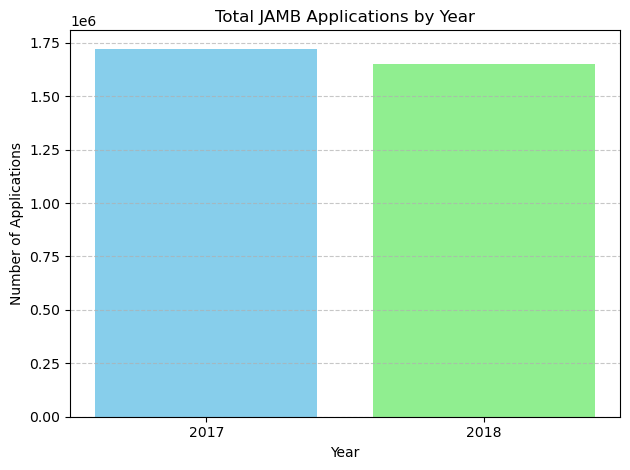

In [17]:
import matplotlib.pyplot as plt

# Plot total applications by year
years = ['2017', '2018']
totals = [total_2017, total_2018]

plt.bar(years, totals, color=['skyblue', 'lightgreen'])
plt.title('Total JAMB Applications by Year')
plt.ylabel('Number of Applications')
plt.xlabel('Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [18]:
# Calculate total female and male applications by year
female_2017 = df['2017_Female'].sum()
male_2017 = df['2017_Male'].sum()

female_2018 = df['2018_Female'].sum()
male_2018 = df['2018_Male'].sum()

print(f"2017 - Female: {female_2017:,}, Male: {male_2017:,}")
print(f"2018 - Female: {female_2018:,}, Male: {male_2018:,}")


2017 - Female: 769,833, Male: 952,436
2018 - Female: 750,951, Male: 902,176


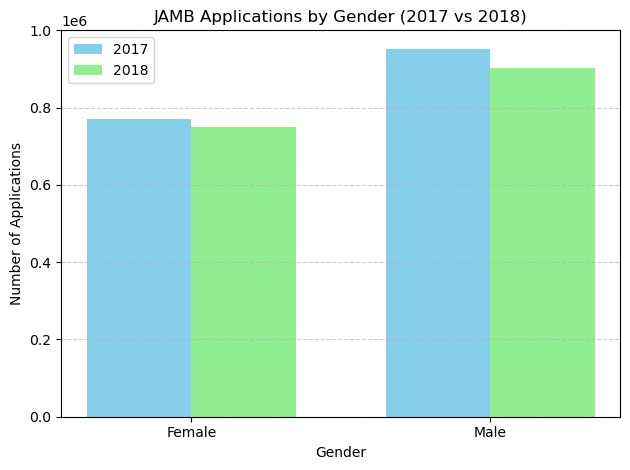

In [19]:

labels = ['Female', 'Male']
values_2017 = [female_2017, male_2017]
values_2018 = [female_2018, male_2018]

x = range(len(labels))
bar_width = 0.35

plt.bar(x, values_2017, width=bar_width, label='2017', color='skyblue')
plt.bar([p + bar_width for p in x], values_2018, width=bar_width, label='2018', color='lightgreen')

plt.xlabel('Gender')
plt.ylabel('Number of Applications')
plt.title('JAMB Applications by Gender (2017 vs 2018)')
plt.xticks([p + bar_width / 2 for p in x], labels)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [20]:
total_2017 = female_2017 + male_2017
total_2018 = female_2018 + male_2018

print("2017 Gender Distribution:")
print(f"  Female: {female_2017 / total_2017:.2%}")
print(f"  Male:   {male_2017 / total_2017:.2%}")

print("2018 Gender Distribution:")
print(f"  Female: {female_2018 / total_2018:.2%}")
print(f"  Male:   {male_2018 / total_2018:.2%}")


2017 Gender Distribution:
  Female: 44.70%
  Male:   55.30%
2018 Gender Distribution:
  Female: 45.43%
  Male:   54.57%


In [21]:
# Sort by 2018 total applications (optional)
top_states_2018 = df.sort_values(by='2018_Total', ascending=False)

# Preview top 10 states
print(top_states_2018[['State', '2017_Total', '2018_Total']].head(10))


                   State  2017_Total  2018_Total
19  IMO                       102188       93048
33  OYO                        87827       86687
32  OSUN                       88803       86065
30  OGUN                       81536       80453
12  DELTA                      81478       80131
6   ANAMBRA                    77452       72871
14  EDO                        66261       66552
21  KADUNA                     72219       65992
22  KANO                       70498       64818
31  ONDO                       66911       63950


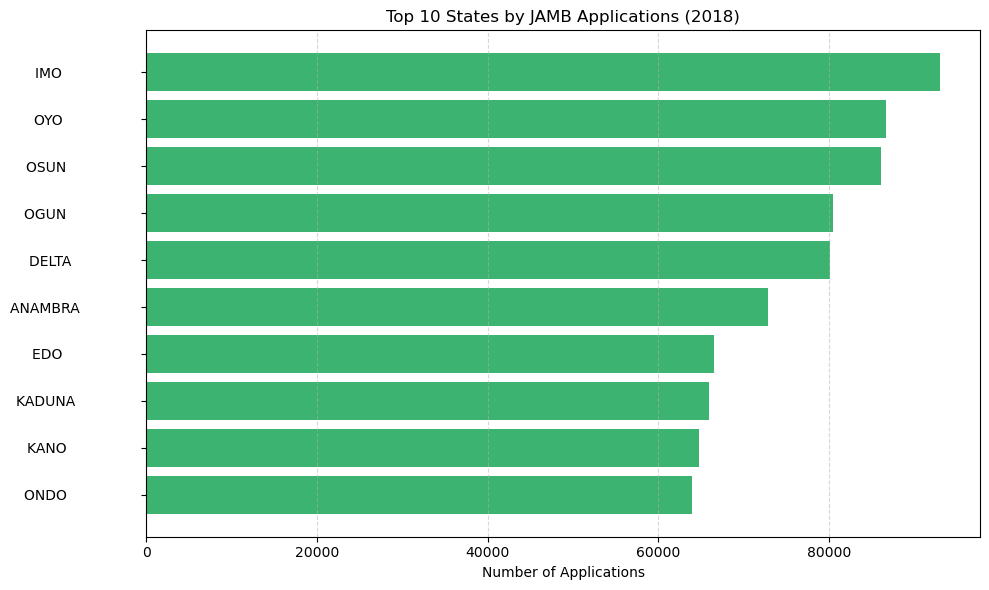

In [22]:

top10 = top_states_2018.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top10['State'], top10['2018_Total'], color='mediumseagreen')
plt.xlabel('Number of Applications')
plt.title('Top 10 States by JAMB Applications (2018)')
plt.gca().invert_yaxis()  # Highest on top
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [23]:
df['2017_Female_Pct'] = (df['2017_Female'] / df['2017_Total']) * 100
df['2018_Female_Pct'] = (df['2018_Female'] / df['2018_Total']) * 100

# Top 5 states with highest female percentage in 2018
print(df[['State', '2018_Female_Pct']].sort_values(by='2018_Female_Pct', ascending=False).head(5))


                   State  2018_Female_Pct
16  ENUGU                       55.679369
40                OTHERS        55.438596
6   ANAMBRA                     55.223614
19  IMO                         54.666409
3   ABIA                        53.266594


C:\Users\Dell\AppData\Local\Temp\ipykernel_11512\196839231.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='2018_Female_Pct', y='State', data=sorted_female_pct, palette='coolwarm')


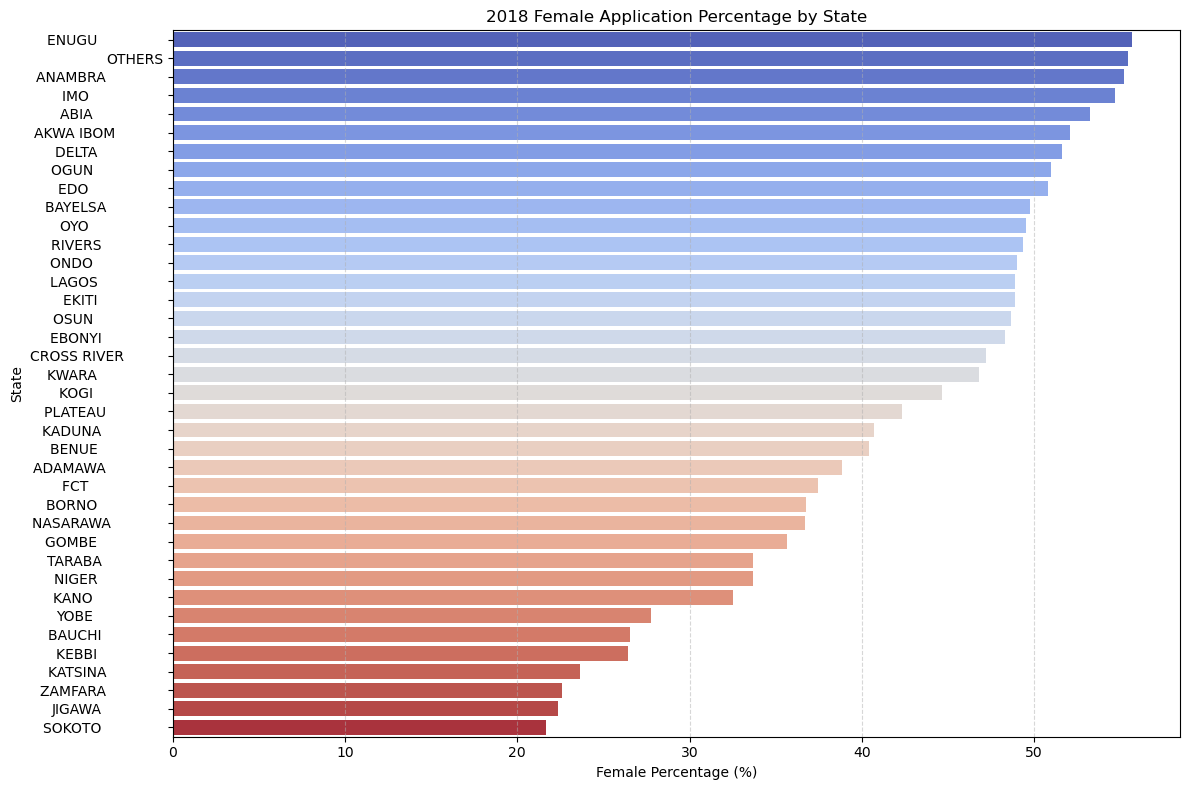

In [24]:
import seaborn as sns

# Sort by 2018 Female Percentage
sorted_female_pct = df.sort_values(by='2018_Female_Pct', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='2018_Female_Pct', y='State', data=sorted_female_pct, palette='coolwarm')

plt.xlabel('Female Percentage (%)')
plt.title('2018 Female Application Percentage by State')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [25]:
top_growth = df.sort_values(by='YoY_Growth_Rate', ascending=False)
print(top_growth[['State', 'YoY_Growth_Rate']].head(5))


                   State  YoY_Growth_Rate
10  BORNO                        0.146116
38  YOBE                         0.128496
24  KEBBI                        0.101529
18  GOMBE                        0.057881
15  EKITI                        0.028151


C:\Users\Dell\AppData\Local\Temp\ipykernel_11512\1261155409.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='YoY_Growth_Rate', y='State', data=df_sorted_growth, palette='crest')


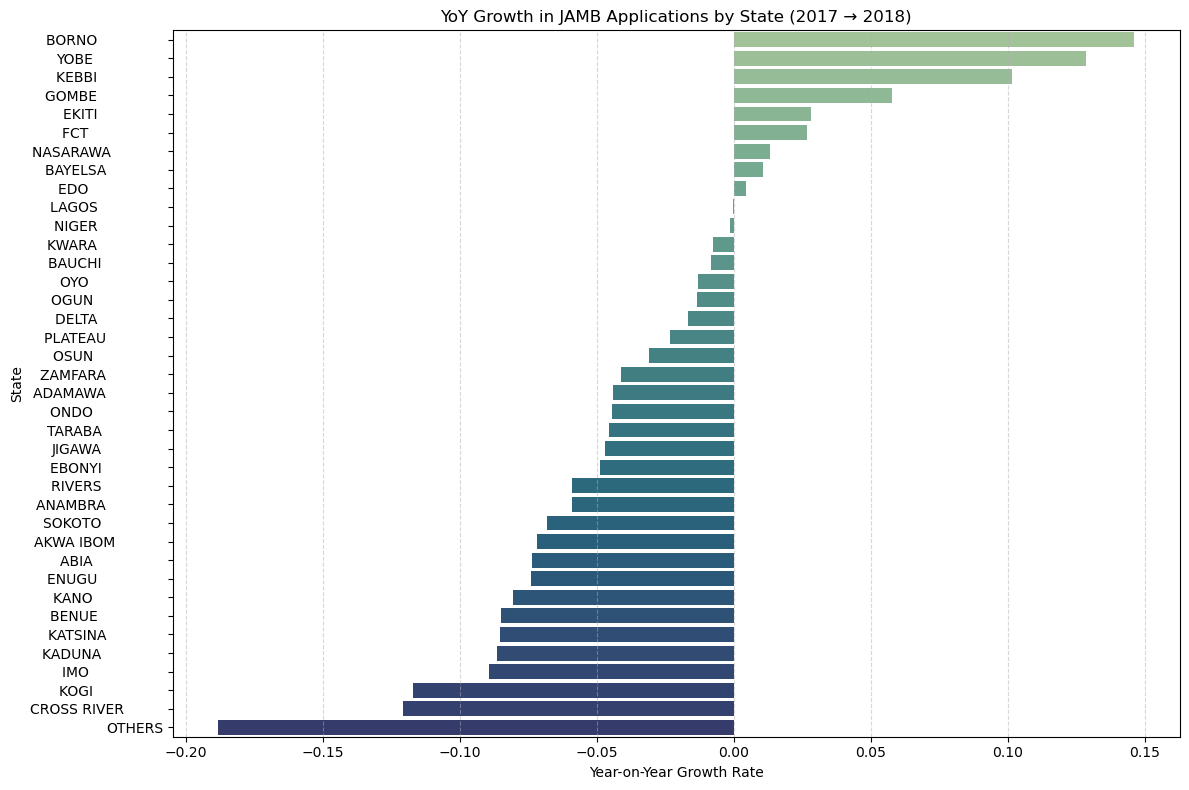

In [26]:
# Sort for plotting
df_sorted_growth = df.sort_values(by='YoY_Growth_Rate', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='YoY_Growth_Rate', y='State', data=df_sorted_growth, palette='crest')

plt.xlabel('Year-on-Year Growth Rate')
plt.title('YoY Growth in JAMB Applications by State (2017 → 2018)')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("Enugu-Electricity-Distribution-Plc.-Monthly-Energy-Cap-May-2025.xlsx")

# Rename columns
df.rename(columns={
    "Business Unit": "Business_Unit",
    "Feeder": "Feeder",
    "Non- MD\nService Band": "Service_Band",
    "January Cap (kWh)": "Jan_Cap_kWh",
    "February Cap (kWh)": "Feb_Cap_kWh",
    "March Cap (kWh)": "Mar_Cap_kWh",
    "April Cap (kWh)": "Apr_Cap_kWh",
    "May Cap (kWh)": "May_Cap_kWh"
}, inplace=True)

# Preview the cleaned DataFrame
print(df.head())



  Business_Unit                     Feeder Service_Band  Jan_Cap_kWh  \
0     ABAKALIKI  ABAKALIKI INDUSTRIAL 11KV            A          268   
1     ABAKALIKI    ABAKALIKI TOWNSHIP 11KV            A          268   
2     ABAKALIKI                AFIKPO 33KV            A          100   
3     ABAKALIKI            AZUIYIOKWU 11KV            A          140   
4     ABAKALIKI         AZUIYIOKWU 2, 11KV            A          144   

   Feb_Cap_kWh  Mar_Cap_kWh  Apr_Cap_kWh  May_Cap_kWh  
0          274          290          302          309  
1          274          290          302          309  
2          102          108          112          115  
3          143          152          158          161  
4          147          156          162          166  


In [3]:
# Create a Total and Average energy cap column per feeder
df["Total_Cap_kWh"] = df[["Jan_Cap_kWh", "Feb_Cap_kWh", "Mar_Cap_kWh", "Apr_Cap_kWh", "May_Cap_kWh"]].sum(axis=1)
df["Average_Cap_kWh"] = df[["Jan_Cap_kWh", "Feb_Cap_kWh", "Mar_Cap_kWh", "Apr_Cap_kWh", "May_Cap_kWh"]].mean(axis=1)
df["Cap_StdDev_kWh"] = df[["Jan_Cap_kWh", "Feb_Cap_kWh", "Mar_Cap_kWh", "Apr_Cap_kWh", "May_Cap_kWh"]].std(axis=1)

# Preview to check the new columns
print(df[["Feeder", "Total_Cap_kWh", "Average_Cap_kWh", "Cap_StdDev_kWh"]].head())


                      Feeder  Total_Cap_kWh  Average_Cap_kWh  Cap_StdDev_kWh
0  ABAKALIKI INDUSTRIAL 11KV           1443            288.6       17.572706
1    ABAKALIKI TOWNSHIP 11KV           1443            288.6       17.572706
2                AFIKPO 33KV            537            107.4        6.387488
3            AZUIYIOKWU 11KV            754            150.8        9.148770
4         AZUIYIOKWU 2, 11KV            775            155.0        9.433981


In [4]:
top10_total = df.sort_values("Total_Cap_kWh", ascending=False).head(10)
print("Top 10 Feeders by Total Energy Cap (kWh):")
print(top10_total[["Feeder", "Business_Unit", "Total_Cap_kWh"]])


Top 10 Feeders by Total Energy Cap (kWh):
                          Feeder Business_Unit  Total_Cap_kWh
214          ABAKALIKI ROAD 11KV          OGUI           3216
36                 NEW NNPC 33KV        ABAKPA           2825
42              TRANS-EKULU 33KV        ABAKPA           2798
43                      UDI 33KV        ABAKPA           2564
102         AIRPORT 33KV(MBAISE)        MBAISE           2523
208                     PPI 11KV         OGIDI           2500
35   KINGSWAY LINE 2 33KV_ABAKPA        ABAKPA           2365
189                 AGULERI 33KV         OGIDI           2274
281               OWERRI 3, 33KV        OWERRI           2258
222        GOVERNMENT HOUSE 33KV          OGUI           2233


In [5]:
bottom10_total = df.sort_values("Total_Cap_kWh", ascending=True).head(10)
print("\nBottom 10 Feeders by Total Energy Cap (kWh):")
print(bottom10_total[["Feeder", "Business_Unit", "Total_Cap_kWh"]])



Bottom 10 Feeders by Total Energy Cap (kWh):
                          Feeder Business_Unit  Total_Cap_kWh
289              AMAOGWUGWU 11KV       UMUAHIA            328
301  NKWOEGWU-ABIRIBA 33KV T-OFF       UMUAHIA            328
253              OKIGWE 33(ORLU)          ORLU            359
108           MBAISE - OGBE 33KV        MBAISE            361
109       MBAISE - UMUAWADA 33KV        MBAISE            362
286                 ABIRIBA 11KV       UMUAHIA            362
121       OBOWO-EHIME MBANO 33KV        MBAISE            364
125   OKIGWE - ISIALA MBANO 33KV        MBAISE            364
122      OBOWO-IHITTE UBOMA 33KV        MBAISE            364
302                  NTIGHA 33KV       UMUAHIA            380


In [6]:
most_stable = df.sort_values("Cap_StdDev_kWh").head(10)
print("\nTop 10 Most Stable Feeders (Low Std Dev):")
print(most_stable[["Feeder", "Business_Unit", "Cap_StdDev_kWh"]])



Top 10 Most Stable Feeders (Low Std Dev):
                 Feeder Business_Unit  Cap_StdDev_kWh
106          LAGWA 11KV        MBAISE        2.645751
117        NKWOALA 11KV        MBAISE        2.701851
171          ATANI 33KV        OGBARU        2.863564
39        NTA 11KV -SUB        ABAKPA        2.880972
57            NIMO 11KV          AWKA        3.049590
153          UBAHU 11KV         NNEWI        3.507136
71     GARIKI EAST 11KV     AWKUNANAW        3.507136
108  MBAISE - OGBE 33KV        MBAISE        3.834058
87          EZIOKO 11KV     EKWULOBIA        3.847077
67     AMECHI-AWGU 33kV     AWKUNANAW        3.911521


In [7]:
most_unstable = df.sort_values("Cap_StdDev_kWh", ascending=False).head(10)
print("\nTop 10 Most Unstable Feeders (High Std Dev):")
print(most_unstable[["Feeder", "Business_Unit", "Cap_StdDev_kWh"]])



Top 10 Most Unstable Feeders (High Std Dev):
                          Feeder Business_Unit  Cap_StdDev_kWh
35   KINGSWAY LINE 2 33KV_ABAKPA        ABAKPA      341.780631
42              TRANS-EKULU 33KV        ABAKPA      339.698101
103                   AMUZU 11KV        MBAISE      319.816666
102         AIRPORT 33KV(MBAISE)        MBAISE      309.976289
110                  MBAISE 33KV        MBAISE      230.749865
53               ENUGU UKWU 33KV          AWKA      226.793518
21                 ABOR LEG 33KV        ABAKPA      204.531660
43                      UDI 33KV        ABAKPA      197.597318
84                    AMUDA 11KV     EKWULOBIA      189.414097
181                    IUNT 11KV        OGBARU      174.809039


C:\Users\Dell\AppData\Local\Temp\ipykernel_3028\2261693446.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_total, x="Total_Cap_kWh", y="Feeder", palette="Blues_d")


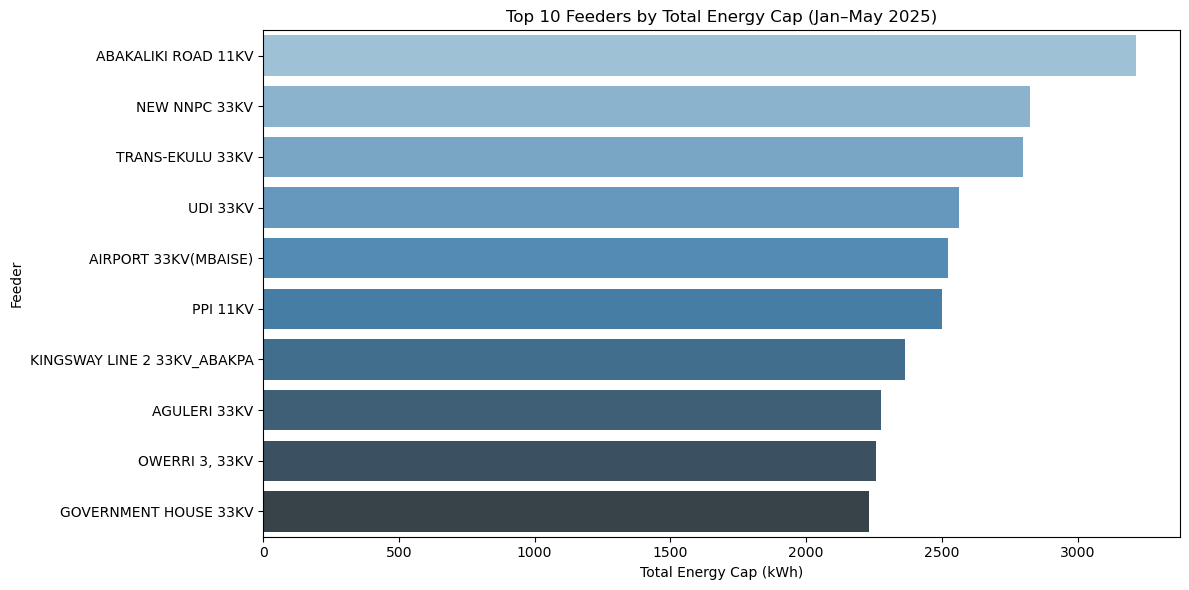

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot setup
plt.figure(figsize=(12, 6))
sns.barplot(data=top10_total, x="Total_Cap_kWh", y="Feeder", palette="Blues_d")
plt.title("Top 10 Feeders by Total Energy Cap (Jan–May 2025)")
plt.xlabel("Total Energy Cap (kWh)")
plt.ylabel("Feeder")
plt.tight_layout()
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_3028\3775603918.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_unstable, x="Cap_StdDev_kWh", y="Feeder", palette="Reds_d")


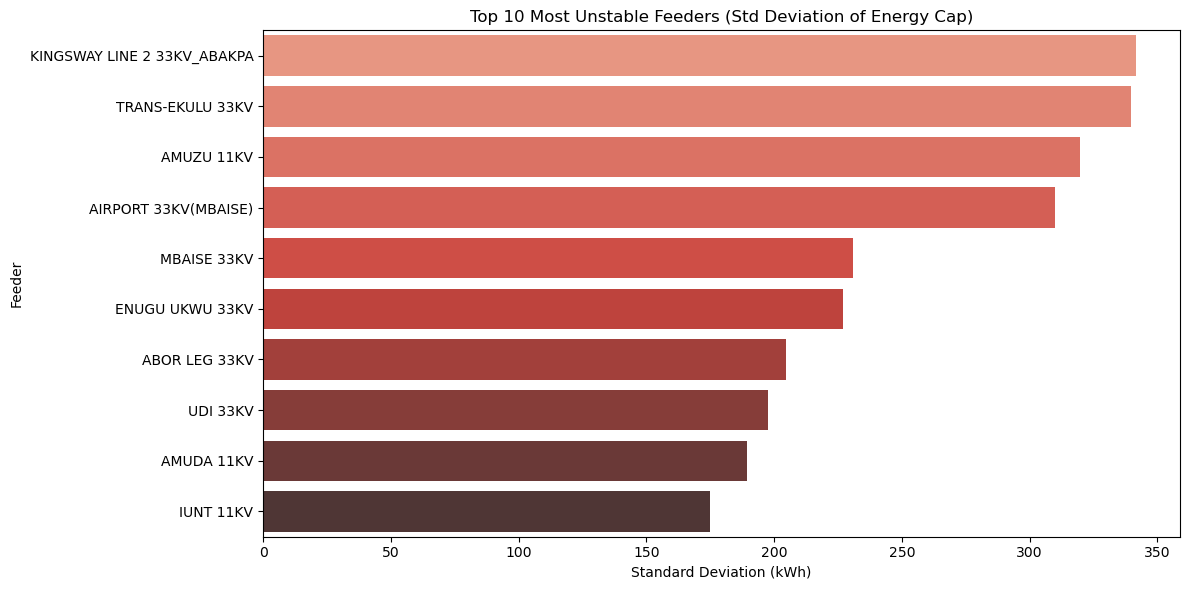

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(data=most_unstable, x="Cap_StdDev_kWh", y="Feeder", palette="Reds_d")
plt.title("Top 10 Most Unstable Feeders (Std Deviation of Energy Cap)")
plt.xlabel("Standard Deviation (kWh)")
plt.ylabel("Feeder")
plt.tight_layout()
plt.show()


In [10]:
# Group by Business Unit
bu_summary = df.groupby("Business_Unit").agg(
    Total_Energy_Cap_kWh=("Total_Cap_kWh", "sum"),
    Average_Energy_Cap_kWh=("Average_Cap_kWh", "mean"),
    StdDev_Cap_kWh=("Cap_StdDev_kWh", "mean"),
    Number_of_Feeders=("Feeder", "count")
).reset_index()

# Display summary
print(bu_summary)


   Business_Unit  Total_Energy_Cap_kWh  Average_Energy_Cap_kWh  \
0      ABAKALIKI                 12760              150.117647   
1         ABAKPA                 34273              236.365517   
2           AWKA                 16593              195.211765   
3      AWKUNANAW                 12593              179.900000   
4      EKWULOBIA                 20870              166.960000   
5         MBAISE                 19335              148.730769   
6     NEW OWERRI                  9616              174.836364   
7          NNEWI                 19550              205.789474   
8         NSUKKA                 10242              157.569231   
9         OGBARU                 18882              222.141176   
10         OGIDI                 27785              213.730769   
11          OGUI                 25509              255.090000   
12       ONITSHA                 10543              140.573333   
13          ORLU                 11174              148.986667   
14        

C:\Users\Dell\AppData\Local\Temp\ipykernel_3028\2015018457.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bu_summary.sort_values("Total_Energy_Cap_kWh", ascending=False),


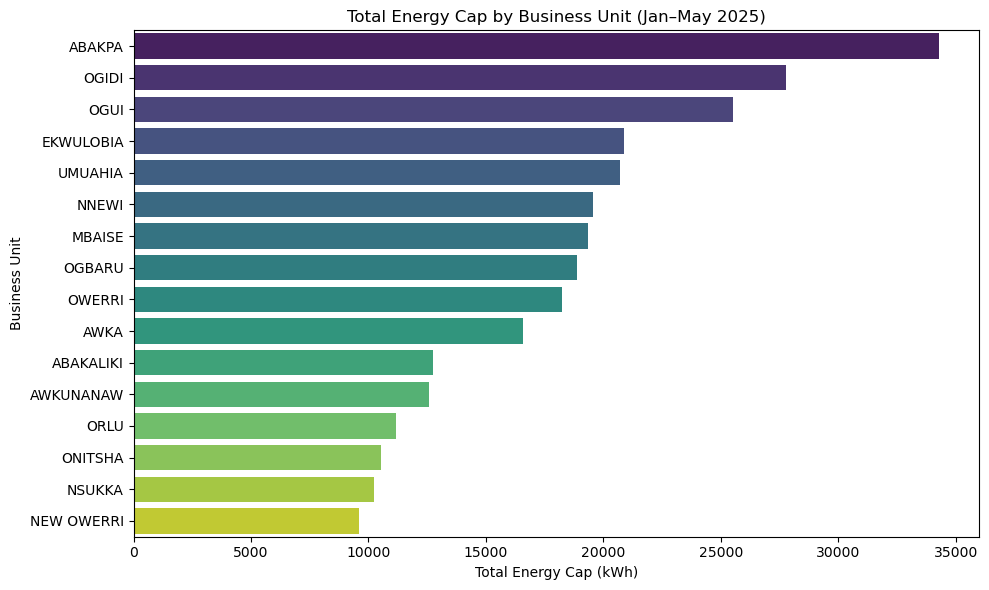

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(data=bu_summary.sort_values("Total_Energy_Cap_kWh", ascending=False),
            x="Total_Energy_Cap_kWh", y="Business_Unit", palette="viridis")
plt.title("Total Energy Cap by Business Unit (Jan–May 2025)")
plt.xlabel("Total Energy Cap (kWh)")
plt.ylabel("Business Unit")
plt.tight_layout()
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_3028\3481841545.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bu_summary.sort_values("Average_Energy_Cap_kWh", ascending=False),


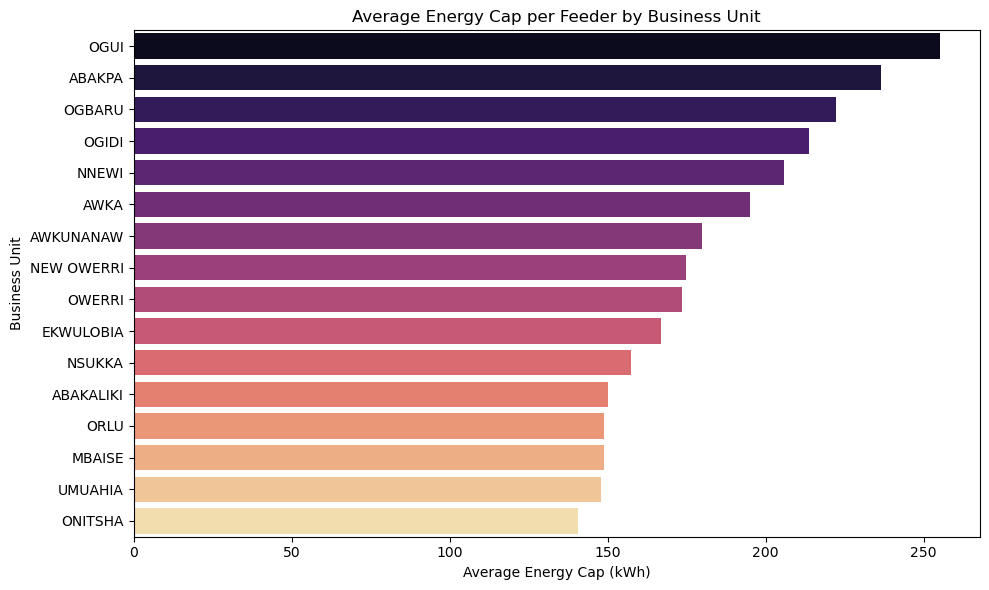

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(data=bu_summary.sort_values("Average_Energy_Cap_kWh", ascending=False),
            x="Average_Energy_Cap_kWh", y="Business_Unit", palette="magma")
plt.title("Average Energy Cap per Feeder by Business Unit")
plt.xlabel("Average Energy Cap (kWh)")
plt.ylabel("Business Unit")
plt.tight_layout()
plt.show()


In [13]:
# Top feeder(s) per BU by total energy cap
top_per_bu = df.loc[df.groupby("Business_Unit")["Total_Cap_kWh"].idxmax()].sort_values("Business_Unit")
print("Top feeder per Business Unit:")
print(top_per_bu[["Business_Unit", "Feeder", "Total_Cap_kWh"]])


Top feeder per Business Unit:
    Business_Unit                      Feeder  Total_Cap_kWh
0       ABAKALIKI   ABAKALIKI INDUSTRIAL 11KV           1443
36         ABAKPA               NEW NNPC 33KV           2825
53           AWKA             ENUGU UKWU 33KV           1843
76      AWKUNANAW                   UNEC 11KV           1342
93      EKWULOBIA           OGBUNKA ROAD 11KV           1810
102        MBAISE        AIRPORT 33KV(MBAISE)           2523
138    NEW OWERRI  WORLD BANK NEW OWERRI 11KV           1749
151         NNEWI         OBOSI-ORAIFITE 33KV           1892
160        NSUKKA                 CAMPUS 11KV           1319
174        OGBARU                  DOZZY 11KV           2004
208         OGIDI                    PPI 11KV           2500
214          OGUI         ABAKALIKI ROAD 11KV           3216
234       ONITSHA                   3-3, 33KV           1001
250          ORLU       IHIOMA ROAD ORLU 11KV           1323
281        OWERRI              OWERRI 3, 33KV          

In [14]:
# Bottom feeder(s) per BU by total energy cap
bottom_per_bu = df.loc[df.groupby("Business_Unit")["Total_Cap_kWh"].idxmin()].sort_values("Business_Unit")
print("\nBottom feeder per Business Unit:")
print(bottom_per_bu[["Business_Unit", "Feeder", "Total_Cap_kWh"]])



Bottom feeder per Business Unit:
    Business_Unit                     Feeder  Total_Cap_kWh
12      ABAKALIKI          ONICHA 33KV T-OFF            469
31         ABAKPA      EMENE INDUSTRIAL 33KV            484
61           AWKA                  UKPO 11KV            525
68      AWKUNANAW        ARMY AWKUNANAW 11KV            665
100     EKWULOBIA        UMURU ADAZIANI 11KV            439
108        MBAISE         MBAISE - OGBE 33KV            361
133    NEW OWERRI      IRETE INDUSTRIAL 11KV            544
140         NNEWI               MBANAGU 11KV            656
163        NSUKKA  IBAGWA - ENUGU EZIKE 33KV            642
171        OGBARU                 ATANI 33KV            546
204         OGIDI                 NKPOR 11KV            461
215          OGUI                  ACHI 33KV            449
238       ONITSHA           GRA ONITSHA 11KV            492
253          ORLU            OKIGWE 33(ORLU)            359
273        OWERRI                MBIERI 11KV            411
289   

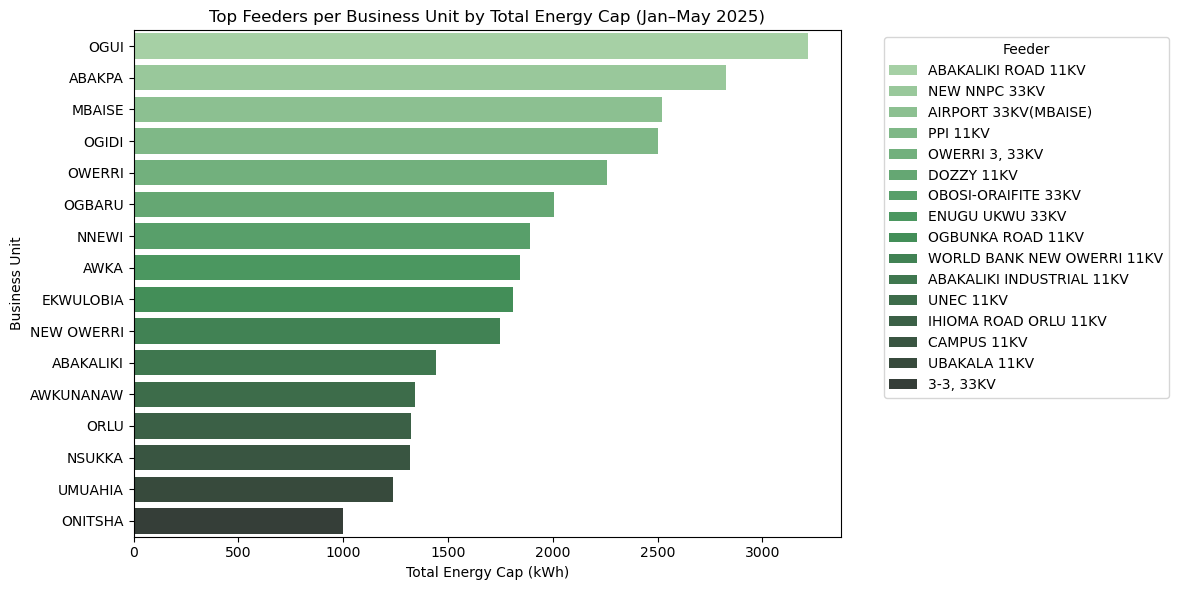

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_per_bu.sort_values("Total_Cap_kWh", ascending=False),
            x="Total_Cap_kWh", y="Business_Unit", hue="Feeder", dodge=False, palette="Greens_d")
plt.title("Top Feeders per Business Unit by Total Energy Cap (Jan–May 2025)")
plt.xlabel("Total Energy Cap (kWh)")
plt.ylabel("Business Unit")
plt.legend(title="Feeder", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


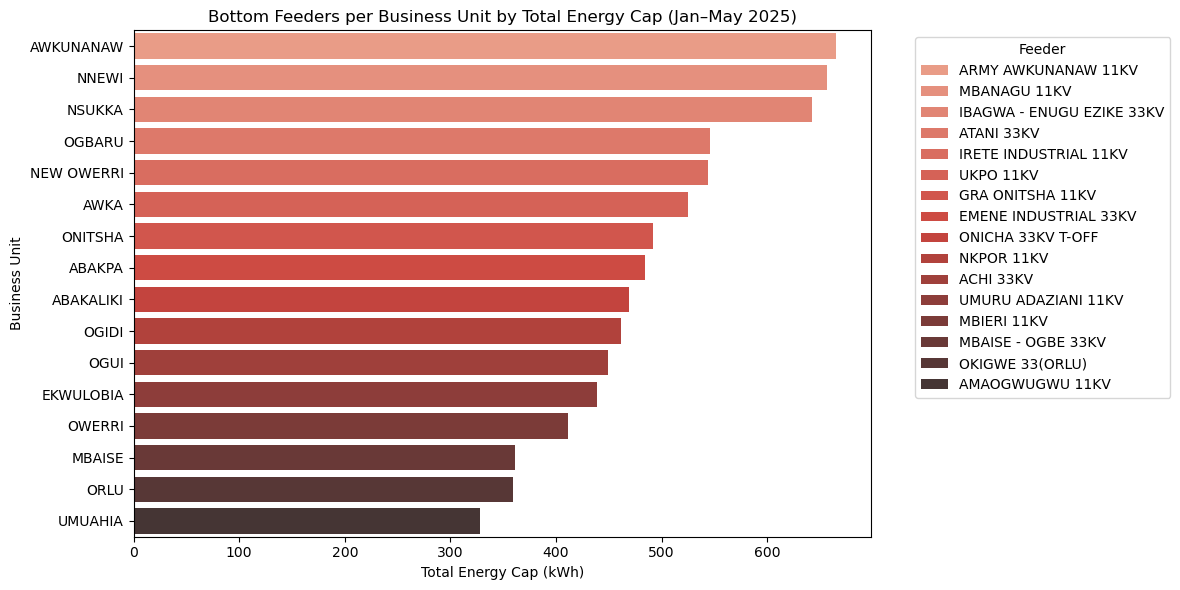

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(data=bottom_per_bu.sort_values("Total_Cap_kWh", ascending=False),
            x="Total_Cap_kWh", y="Business_Unit", hue="Feeder", dodge=False, palette="Reds_d")
plt.title("Bottom Feeders per Business Unit by Total Energy Cap (Jan–May 2025)")
plt.xlabel("Total Energy Cap (kWh)")
plt.ylabel("Business Unit")
plt.legend(title="Feeder", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
